# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

In Some states Participation rates for SAT are declining while ACT are rising. 
Problem: 
        1.Identify states that are dropping SAT as the majority participation and moving to ACT 
        2.Convince the states to switch to SAT

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [169]:
#Imports:
import pandas as pd
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from IPython.display import display
import scipy.stats as stats

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [170]:
#Code:
#read all csv
sat_df_2017 = pd.read_csv('./data/sat_2017.csv')
act_df_2017 = pd.read_csv('./data/act_2017.csv')
sat_df_2018 = pd.read_csv('./data/sat_2018.csv')
act_df_2018 = pd.read_csv('./data/act_2018.csv')


In [171]:
#combine csv into a list for easy viewing
ls_df = [sat_df_2017,act_df_2017,sat_df_2018,act_df_2018]

In [172]:
#simple quick display functions
def display_df_head(ls):
    for item in ls:
        display(item.head(3))
        
def display_df(ls):
    for item in ls:
        display(item)
        
def describe_df(ls):
    for item in ls:
        display(item.describe())
        
def info_df(ls):
    for item in ls:
        display(item.dtypes)

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [173]:
#Code: Print the first 10 rows of each dataframe to your jupyter notebook
display(sat_df_2017.head(10))
display(act_df_2017.head(10))

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: SAT AND ACT results for the year 2017 and 2018

#### 4a. Does the data look complete? 

 Answer: 
1. Data looks complete with 50 states however ACT have 'national' but SAT do not have the national average


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:
- SAT 
     min : 200 per section/ 800 total
     max : 1600 max
- ACT
     min: 1
     max: 36

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [174]:
#sat df was 52 for math instead of 524
sat_df_2017.at[20,"Math"] = 524

In [175]:
#remove 'x' from [wyoming,'Composite']
act_df_2017.at[51, 'Composite'] = 20.2
act_df_2017.tail(3)

,State,Participation,English,Math,Reading,Science,Composite
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


In [176]:
#Remove 'National' and reset index
act_df_2017.drop([0],inplace = True)
act_df_2017.reset_index(inplace = True,drop = True)

In [177]:
#get info on all data types from all csv
info_df(ls_df)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [178]:
#change 'composite to float after removing 'x'
act_df_2017['Composite']=act_df_2017['Composite'].astype('float64')


In [179]:
#find any 'off' results
df = act_df_2017
df[((df['English']+df['Math']+df['Reading']+df['Science'])/4  + 0.4 )< df['Composite'] ]

,State,Participation,English,Math,Reading,Science,Composite
20,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [180]:
#replacing any off results
act_df_2017.at[20, 'Science'] = 23.2
act_df_2017.head(22)

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100%,18.9,18.4,19.7,19.4,19.2
1,Alaska,65%,18.7,19.8,20.4,19.9,19.8
2,Arizona,62%,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
4,California,31%,22.5,22.7,23.1,22.2,22.8
5,Colorado,100%,20.1,20.3,21.2,20.9,20.8
6,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
7,Delaware,18%,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2
9,Florida,73%,19.0,19.4,21.0,19.4,19.8


#### 5. What are your data types? 
Display the data types of each feature. 

In [181]:
#code
info_df(ls_df)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 'Participation' in all dataframe

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [182]:
#function to change all 'participation columns together'
def strip_participation(ls):
    for items in ls:
        items['Participation'] = items['Participation'].str.strip('%')
        items['Participation'] = items['Participation'].astype('float64')

In [183]:
strip_participation(ls_df)

In [184]:
#check df
display_df(ls_df)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055
5,Colorado,11.0,606,595,1201
6,Connecticut,100.0,530,512,1041
7,Delaware,100.0,503,492,996
8,District of Columbia,100.0,482,468,950
9,Florida,83.0,520,497,1017


,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076
5,Colorado,100.0,519,506,1025
6,Connecticut,100.0,535,519,1053
7,Delaware,100.0,505,492,998
8,District of Columbia,92.0,497,480,977
9,Florida,56.0,550,549,1099


,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100.0,18.9,18.3,19.6,19.0,19.1
1,Alaska,33.0,19.8,20.6,21.6,20.7,20.8
2,Arizona,66.0,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100.0,19.1,18.9,19.7,19.4,19.4
4,California,27.0,22.5,22.5,23.0,22.1,22.7
5,Colorado,30.0,23.9,23.2,24.4,23.5,23.9
6,Connecticut,26.0,26.0,24.8,26.1,24.9,25.6
7,Delaware,17.0,23.7,23.1,24.5,23.4,23.8
8,District of Columbia,32.0,23.7,22.7,24.4,23.0,23.6
9,Florida,66.0,19.2,19.3,21.1,19.5,19.9


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [185]:
#code lowercase column name
def lower_col_name(ls):
    for item in ls:
        item.columns = map(str.lower,item.columns)
lower_col_name(ls_df)
display_df_head(ls_df)

,state,participation,evidence-based reading and writing,math,total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116


,state,participation,english,math,reading,science,composite
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7


,state,participation,evidence-based reading and writing,math,total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149


,state,participation,english,math,reading,science,composite
0,Alabama,100.0,18.9,18.3,19.6,19.0,19.1
1,Alaska,33.0,19.8,20.6,21.6,20.7,20.8
2,Arizona,66.0,18.2,19.4,19.5,19.2,19.2


#change all columns to include each identifier

In [186]:
sat_df_2017.rename(columns = {'participation':'sat participation 2017'},inplace = True)
sat_df_2017.rename(columns = {'evidence-based reading and writing':'sat reading and writing 2017'},inplace = True)
sat_df_2017.rename(columns = {'math':'sat math 2017'},inplace = True)
sat_df_2017.rename(columns = {'total':'sat total 2017'},inplace = True)

In [187]:
sat_df_2018.rename(columns = {'participation':'sat participation 2018'},inplace = True)
sat_df_2018.rename(columns = {'evidence-based reading and writing':'sat reading and writing 2018'},inplace = True)
sat_df_2018.rename(columns = {'math':'sat math 2018'},inplace = True)
sat_df_2018.rename(columns = {'total':'sat total 2018'},inplace = True)

In [188]:
act_df_2017.rename(columns = {'participation':'act participation 2017'},inplace = True)
act_df_2017.rename(columns = {'english':'act english 2017'},inplace = True)
act_df_2017.rename(columns = {'math':'act math 2017'},inplace = True)
act_df_2017.rename(columns = {'reading':'act reading 2017'},inplace = True)
act_df_2017.rename(columns = {'science':'act science 2017'},inplace = True)
act_df_2017.rename(columns = {'composite':'act composite 2017'},inplace = True)

In [189]:
act_df_2018.rename(columns = {'participation':'act participation 2018'},inplace = True)
act_df_2018.rename(columns = {'english':'act english 2018'},inplace = True)
act_df_2018.rename(columns = {'math':'act math 2018'},inplace = True)
act_df_2018.rename(columns = {'reading':'act reading 2018'},inplace = True)
act_df_2018.rename(columns = {'science':'act science 2018'},inplace = True)
act_df_2018.rename(columns = {'composite':'act composite 2018'},inplace = True)

In [190]:
def space_hyphen(ls):
    for item in ls:
        item.columns=item.columns.str.replace(" " ,'_').str.replace('-','_')
space_hyphen(ls_df)

In [191]:
display_df_head(ls_df)

,state,sat_participation_2017,sat_reading_and_writing_2017,sat_math_2017,sat_total_2017
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116


,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7


,state,sat_participation_2018,sat_reading_and_writing_2018,sat_math_2018,sat_total_2018
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149


,state,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
0,Alabama,100.0,18.9,18.3,19.6,19.0,19.1
1,Alaska,33.0,19.8,20.6,21.6,20.7,20.8
2,Arizona,66.0,18.2,19.4,19.5,19.2,19.2


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 
|state|float|ACT/SAT|Name of state in USA|
|participation|float|ACT/SAT|the 'percentage' of students that attend the exam|
|reading_and_writing|int|SAT|Average Results from Evidence-based reading and writing exam|
|Total|int|SAT|Average Results from combine reading and writing and Math exam|
|english|float|ACT|Average Results from english exam|
|math|float|ACT|Average Results from Math exam|
|reading|float|ACT|Average Results from reading exam|
|science|float|ACT|Average Results from science exam|
|composite|float|ACT|Average Results from average of all ACT exams|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

#code
#previous drop 'national'

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [192]:
combined_2017=sat_df_2017.join(act_df_2017.set_index('state'), on = 'state')

In [193]:
combined_2018= sat_df_2018.join(act_df_2018.set_index('state'), on = 'state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [194]:
final = combined_2017.join(combined_2018.set_index('state'), on ='state')
final_csv = final.to_csv('./data/final.csv')

In [195]:
final.columns

Index(['state', 'sat_participation_2017', 'sat_reading_and_writing_2017',
       'sat_math_2017', 'sat_total_2017', 'act_participation_2017',
       'act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017', 'act_composite_2017', 'sat_participation_2018',
       'sat_reading_and_writing_2018', 'sat_math_2018', 'sat_total_2018',
       'act_participation_2018', 'act_english_2018', 'act_math_2018',
       'act_reading_2018', 'act_science_2018', 'act_composite_2018'],
      dtype='object')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

completed as of above

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [196]:
#Code:
final.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
unique,19.0,19.0,19.0,16.0,18.0,19.0,17.0,17.0,18.0,20.0,...,20.0,18.0,17.0,19.0,21.0,17.0,18.0,19.0,17.0,18.0
top,18.9,19.8,19.2,19.4,22.5,100.0,100.0,100.0,32.0,19.4,...,3.0,19.9,20.7,100.0,23.9,23.5,22.2,20.4,20.6,3.0
freq,2.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,3.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [197]:
# manual calculation of mean
#code
def custom_std(ls):
    mean_ls = np.mean(ls)
    len_ls =len(ls)
    sum_diff = 0
    for item in ls:
        sum_diff += (item - mean_ls)**2
    std = math.sqrt((1/len_ls) * sum_diff)
    return std

In [198]:
ls = list(final.act_participation_2017)
custom_std(ls)

32.482767393108496

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [199]:
#Code:
std_dev_dict={col.name:custom_std(col) for col in [final[i] for i in final.columns if (final[i].dtype=='float64') or (final[i].dtype=='int64')]}
std_dev_dict

{'sat_participation_2017': 35.41242114012987,
 'sat_reading_and_writing_2017': 45.43844591162758,
 'sat_math_2017': 46.88513598499381,
 'sat_total_2017': 92.0422686377098,
 'act_participation_2017': 32.482767393108496,
 'act_english_2017': 2.351220097469729,
 'act_math_2017': 1.9816493563689903,
 'act_reading_2017': 2.06292558815109,
 'act_science_2017': 1.7333175683928808,
 'act_composite_2017': 2.017911657040839,
 'sat_participation_2018': 37.3134412699805,
 'sat_reading_and_writing_2018': 47.117912020123455,
 'sat_math_2018': 47.455129071028026,
 'sat_total_2018': 93.48919343935334,
 'act_participation_2018': 34.21185194650338,
 'act_english_2018': 2.4012909496460586,
 'act_math_2018': 1.9980787739681962,
 'act_reading_2018': 2.1274298672897975,
 'act_science_2018': 1.835936268569397,
 'act_composite_2018': 2.098938693495657}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: there is a slight difference

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [200]:
final.groupby('state').mean()['sat_participation_2017'].sort_values(ascending = False).head(2)

state
Connecticut    100.0
Delaware       100.0
Name: sat_participation_2017, dtype: float64

In [201]:
final.groupby('state').mean()['sat_participation_2017'].sort_values(ascending = True).head(2)


state
North Dakota    2.0
Mississippi     2.0
Name: sat_participation_2017, dtype: float64

In [202]:
final.groupby('state').mean()['sat_participation_2018'].sort_values(ascending = False).head(2)

state
Idaho       100.0
Michigan    100.0
Name: sat_participation_2018, dtype: float64

In [203]:
final.groupby('state').mean()['sat_participation_2018'].sort_values(ascending = True).head(2)


state
North Dakota    2.0
Wyoming         3.0
Name: sat_participation_2018, dtype: float64

In [204]:
final.groupby('state').mean()['act_participation_2017'].sort_values(ascending = False).head(2)

state
Wyoming     100.0
Oklahoma    100.0
Name: act_participation_2017, dtype: float64

In [205]:
final.groupby('state').mean()['act_participation_2017'].sort_values(ascending = True).head(2)


state
Maine             8.0
New Hampshire    18.0
Name: act_participation_2017, dtype: float64

In [206]:
final.groupby('state').mean()['act_participation_2018'].sort_values(ascending = False).head(2)


state
Wyoming     100.0
Oklahoma    100.0
Name: act_participation_2018, dtype: float64

In [207]:
final.groupby('state').mean()['act_participation_2018'].sort_values(ascending = True).head(2)


state
Maine            7.0
Rhode Island    15.0
Name: act_participation_2018, dtype: float64

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

# sns.pairplot(final);

In [208]:
final.columns

Index(['state', 'sat_participation_2017', 'sat_reading_and_writing_2017',
       'sat_math_2017', 'sat_total_2017', 'act_participation_2017',
       'act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017', 'act_composite_2017', 'sat_participation_2018',
       'sat_reading_and_writing_2018', 'sat_math_2018', 'sat_total_2018',
       'act_participation_2018', 'act_english_2018', 'act_math_2018',
       'act_reading_2018', 'act_science_2018', 'act_composite_2018'],
      dtype='object')

In [209]:
participation =[col for col in final.columns if 'participation' in col]
final[participation].head(1)

,sat_participation_2017,act_participation_2017,sat_participation_2018,act_participation_2018
0,5.0,100.0,6.0,100.0


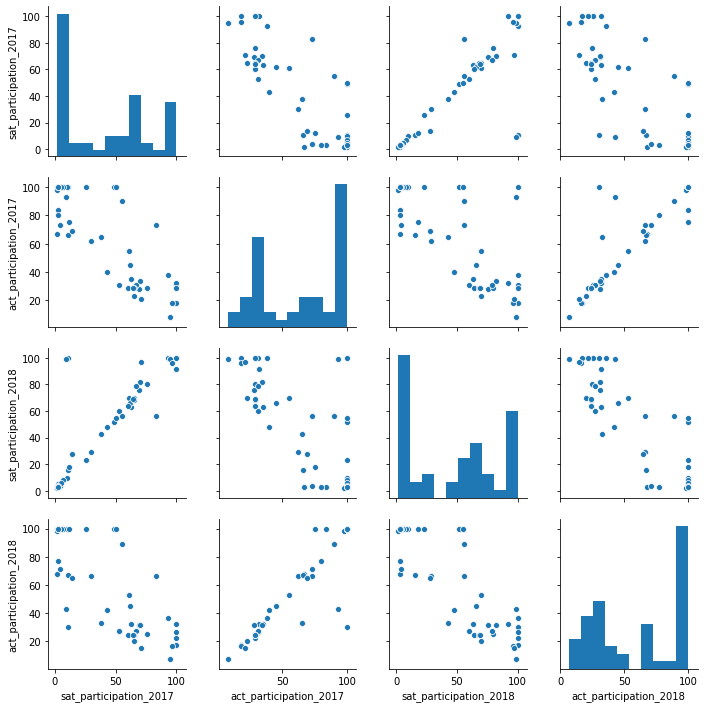

In [210]:
sns.pairplot(final[participation]);

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

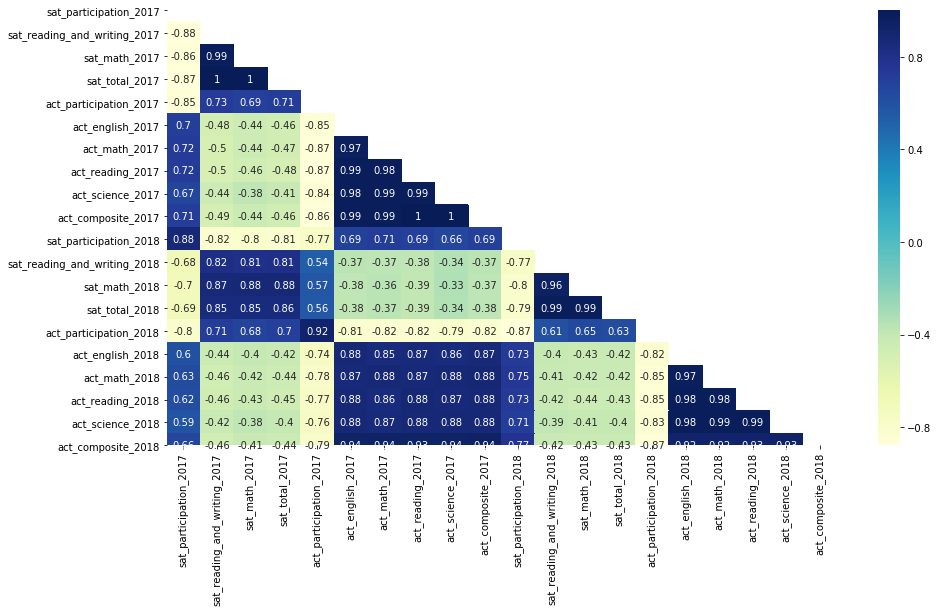

In [211]:
fig, ax = plt.subplots(figsize = (15,8))

masking_matrix =np.zeros_like(final.corr())
# print(masking_matrix)
masking_matrix[np.triu_indices_from(masking_matrix)] = True
# print(masking_matrix)
sns.heatmap(final.corr(), annot = True, mask =masking_matrix, cmap="YlGnBu");

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [212]:
def subplot_histograms(dataframe, list_of_columns):    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize =(10,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_columns[i])# Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_columns[i] )

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [213]:
# Code
part_rate = ['sat_participation_2017','sat_participation_2018', 'act_participation_2017','act_participation_2018']
math_score =['sat_math_2017', 'sat_math_2018','act_math_2017','act_math_2018']
read_score =['sat_reading_and_writing_2017','sat_reading_and_writing_2018','act_reading_2017','act_reading_2018']

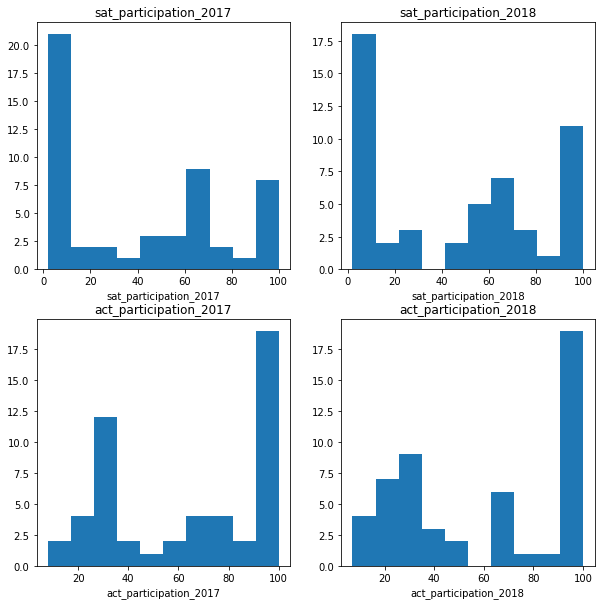

In [214]:
subplot_histograms(final,part_rate)

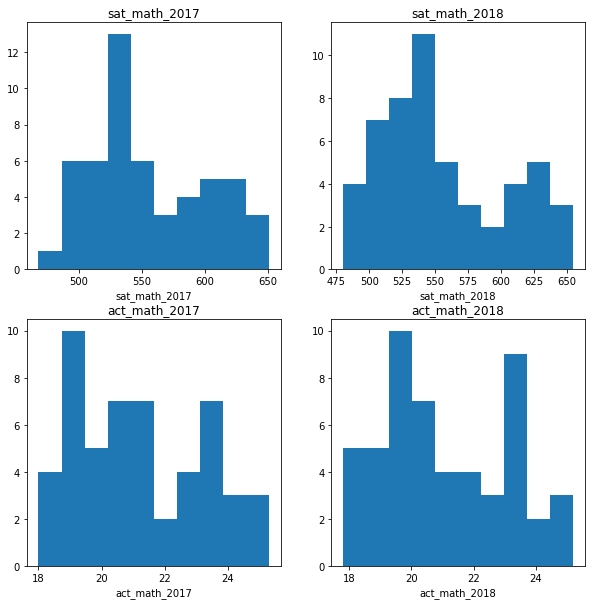

In [215]:
subplot_histograms(final,math_score)

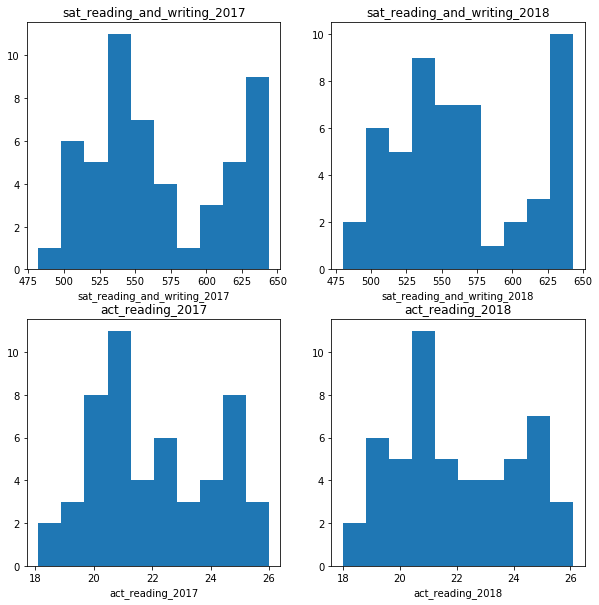

In [216]:
subplot_histograms(final,read_score)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [217]:
def subplot_scatter(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns))) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize =(10,20)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].scatter(x=dataframe[list_of_columns[i][0]],y=dataframe[list_of_columns[i][1]],s=50) # feel free to add more settings
        ax[i].set_title(list_of_columns[i][0] +' against '+list_of_columns[i][1])# Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_columns[i][0])
        ax[i].set_ylabel(list_of_columns[i][1])
        plt.tight_layout()

In [218]:
ls = [['sat_math_2017', 'act_math_2017'], # SAT vs. ACT math scores for 2017
     ['sat_reading_and_writing_2017', 'act_reading_2017'], # SAT vs. ACT verbal/reading scores for 2017
     ['sat_total_2017', 'act_composite_2017'], # SAT vs. ACT total/composite scores for 2017
     ['sat_total_2017', 'sat_total_2018'], # Total scores for SAT 2017 vs. 2018
     ['act_composite_2017', 'act_composite_2018']] # Composite scores for ACT 2017 vs. 2018

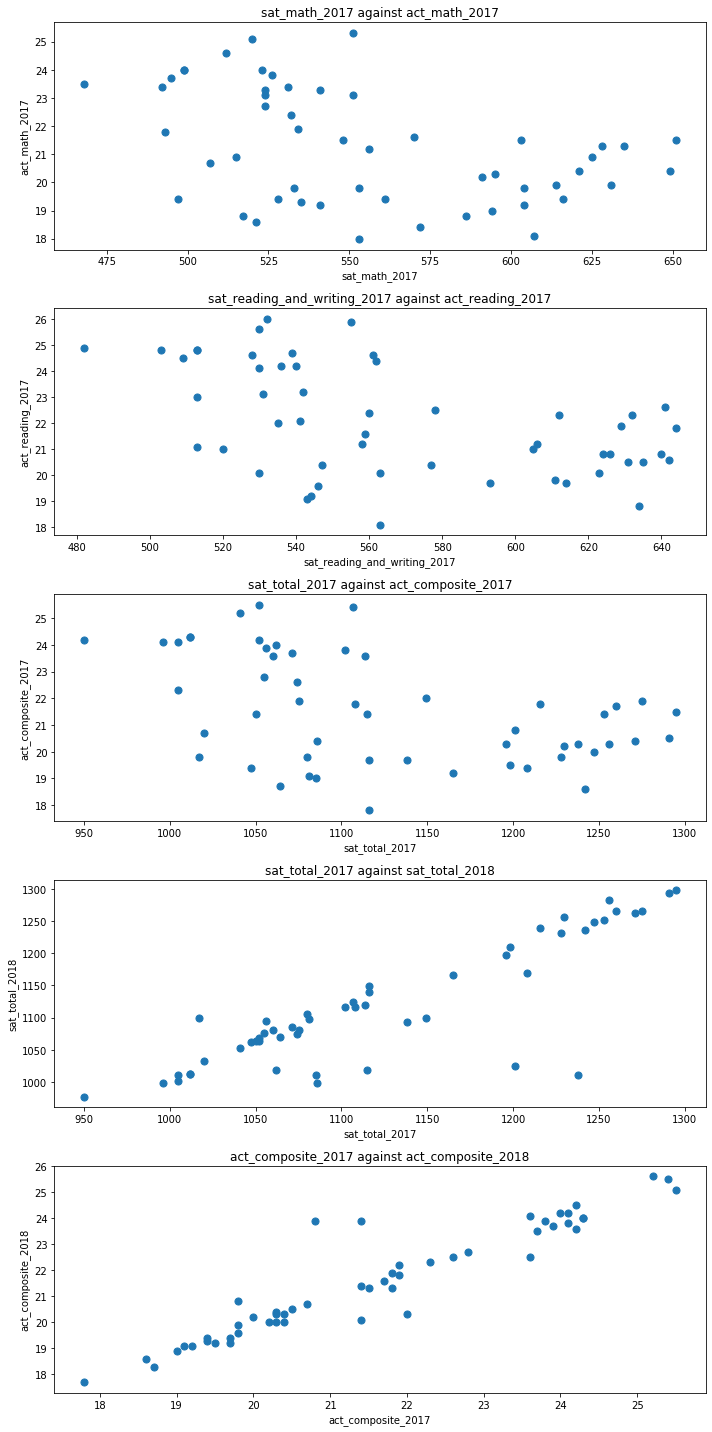

In [219]:
subplot_scatter(final,ls)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

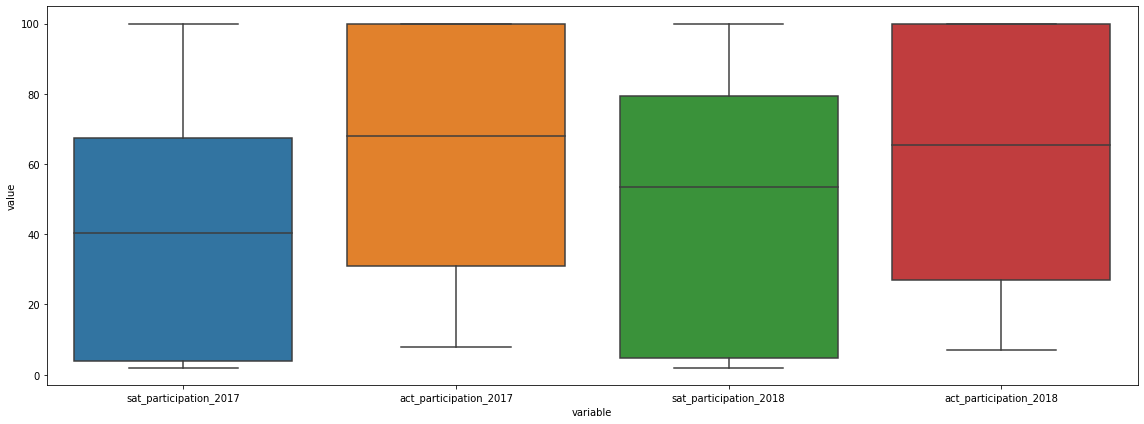

In [220]:

plt.figure(figsize=(16, 6))
sns.boxplot(x='variable', y ='value' ,data = pd.melt(final[participation]));
plt.tight_layout()

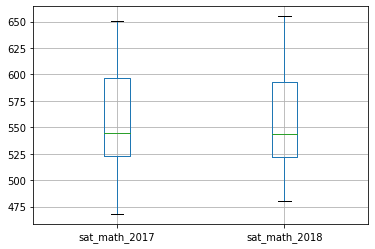

In [221]:
final.boxplot(column= ['sat_math_2017', 'sat_math_2018'])

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

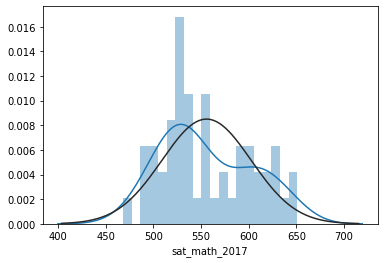

In [222]:
from scipy.stats import norm

# sns.distplot(final.sat_math_2017, bins = 20)
sns.distplot(final.sat_math_2017,fit = norm, bins = 20)

Please refer below as i using dist plot to describe scewness of dataframe columns

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [223]:
final.describe()

,sat_participation_2017,sat_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_reading_and_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,40.865385,568.038462,555.769231,1123.903846,64.153846,20.994231,21.236538,22.067308,21.494231,21.573077,46.769231,562.692308,555.173077,1117.961538,60.673077,20.973077,21.113462,22.001923,21.332692,21.544231
std,35.757916,45.881758,47.342563,92.940263,32.799680,2.374159,2.000983,2.083052,1.750228,2.037599,37.677483,47.577610,47.918117,94.401305,34.545634,2.424719,2.017573,2.148186,1.853848,2.119417
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,4.000000,531.750000,522.500000,1054.250000,31.000000,19.000000,19.400000,20.475000,19.975000,19.800000,4.750000,530.500000,521.750000,1047.750000,27.000000,19.100000,19.400000,20.475000,19.925000,19.975000
50%,40.500000,558.500000,544.500000,1104.500000,68.000000,20.800000,21.050000,21.850000,21.400000,21.400000,53.500000,551.000000,543.500000,1096.000000,65.500000,20.200000,20.650000,21.450000,20.950000,21.300000
75%,67.500000,612.500000,597.000000,1210.000000,100.000000,23.325000,23.150000,24.200000,23.200000,23.625000,79.250000,608.250000,592.750000,1201.000000,100.000000,23.700000,23.125000,24.050000,23.025000,23.725000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000


In [224]:
ls_new = [['act_math_2017', 'act_math_2018'], # SAT vs. ACT math scores for 2017
     ['sat_reading_and_writing_2017', 'sat_reading_and_writing_2018'], # SAT vs. ACT verbal/reading scores for 2017
     ['sat_total_2017', 'act_composite_2017'], # SAT vs. ACT total/composite scores for 2017
     ['sat_total_2017', 'sat_total_2018'], # Total scores for SAT 2017 vs. 2018
     ['act_composite_2017', 'act_composite_2018']] # Composite scores for ACT 2017 vs. 2018

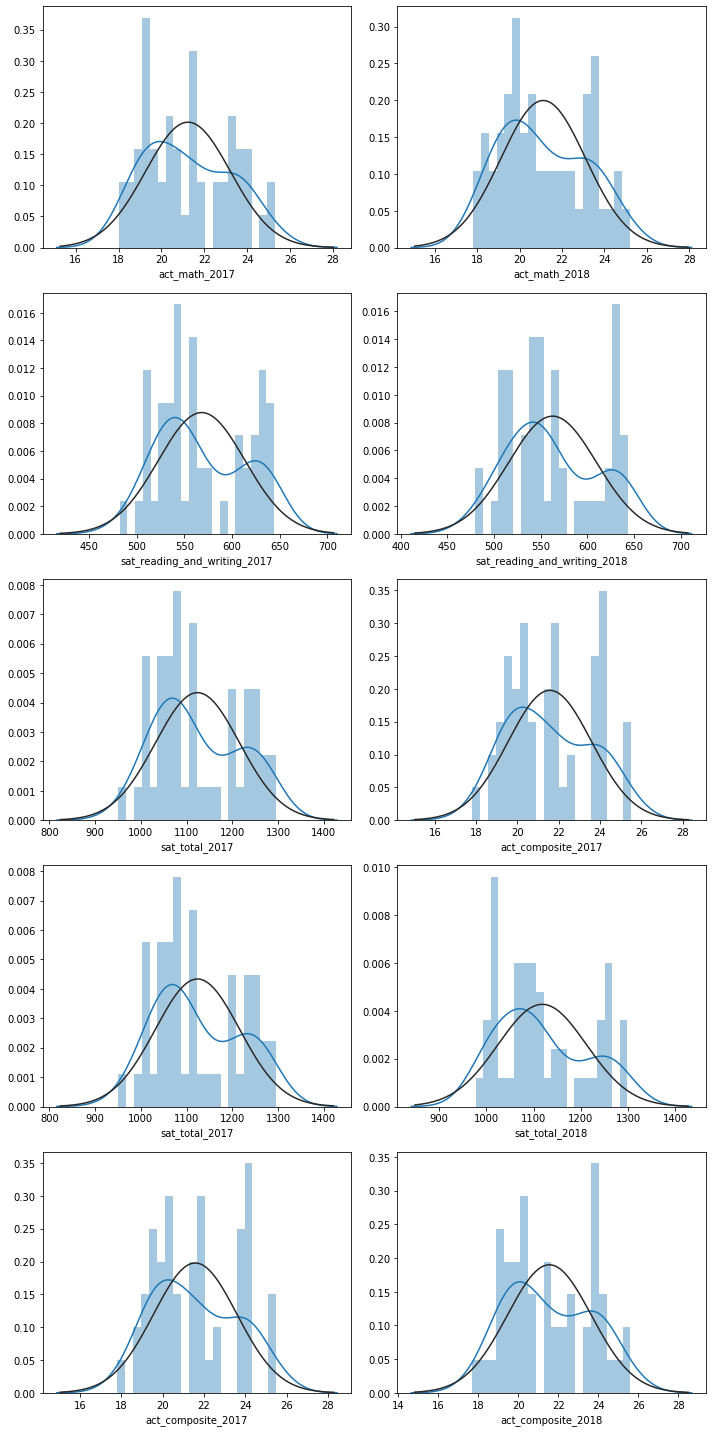

In [225]:
def subplot_distplot(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns))) # Makes sure you have enough rows
    fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize =(10,20)) # You'll want to specify your figsize
#     axs = axs.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, col in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.distplot(dataframe[col[0]], fit = norm, bins = 20, ax = axs[i,0]) 
        sns.distplot(dataframe[col[1]], fit = norm, bins = 20, ax = axs[i,1])
        plt.tight_layout()
        
subplot_distplot(final,ls_new)


In [226]:
def normal_stats(df):
    t_and_p_value = {}
    for col in df.columns[1:]:
        t_val,p_val = stats.normaltest(final[col])
        t_and_p_value1 = {col:{'t_val':float("{0:.5f}".format(t_val)),'p_val':float("{0:.5f}".format(p_val))}}
        t_and_p_value.update(t_and_p_value1)
    return t_and_p_value

In [227]:
normal_stats(final)

{'sat_participation_2017': {'t_val': 30.75499, 'p_val': 0.0},
 'sat_reading_and_writing_2017': {'t_val': 14.32556, 'p_val': 0.00077},
 'sat_math_2017': {'t_val': 6.09707, 'p_val': 0.04743},
 'sat_total_2017': {'t_val': 10.0199, 'p_val': 0.00667},
 'act_participation_2017': {'t_val': 68.13494, 'p_val': 0.0},
 'act_english_2017': {'t_val': 6.24139, 'p_val': 0.04413},
 'act_math_2017': {'t_val': 8.30511, 'p_val': 0.01572},
 'act_reading_2017': {'t_val': 7.81929, 'p_val': 0.02005},
 'act_science_2017': {'t_val': 6.80288, 'p_val': 0.03333},
 'act_composite_2017': {'t_val': 8.26813, 'p_val': 0.01602},
 'sat_participation_2018': {'t_val': 60.9509, 'p_val': 0.0},
 'sat_reading_and_writing_2018': {'t_val': 8.40083, 'p_val': 0.01499},
 'sat_math_2018': {'t_val': 5.05172, 'p_val': 0.07999},
 'sat_total_2018': {'t_val': 8.55196, 'p_val': 0.0139},
 'act_participation_2018': {'t_val': 125.19501, 'p_val': 0.0},
 'act_english_2018': {'t_val': 8.24164, 'p_val': 0.01623},
 'act_math_2018': {'t_val': 8.6

Answers:
Mostly all are normally distributed and skewed to the right.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:
as seen from the distplot. all graph follows is skewed to the right and fairly near a normally distributed graph.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
Yes for all 3. #its currenlt 433am and i just want to complete all the answers><

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:
though the sample (in this case 51 states would exceed the require 30 n sample size however its difficult to give any subtitential results from each individual states. 

A better data would be to accumlate data over 30 different test and obtain information. this enable more indepth analysis into each state.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:
It is not appropriate to compare it directly based on absolute score. 
however it is not impossible to compare both SAT and ACT via percentage of its scoring.
    1.(Both SAT and ACT math) 
        a. Using the mean of the results against the max result possible to attain the average scoring percentage.
        b. Check p_value and ttest value before comparison
    2. Assumptions:
        difficulty for both SAT and ACT 'math' should be very similar/same. 

In [228]:
math = ['state','sat_math_2017', 'sat_math_2018', 'act_math_2017',  'act_math_2018']
final_math =final[math]
# act max score = 36
# sat max score = 800

In [229]:
final_math.dtypes

state             object
sat_math_2017      int64
sat_math_2018      int64
act_math_2017    float64
act_math_2018    float64
dtype: object

In [230]:
def percent_score(x):
    if type(x) is int:
        return round((x/800)*100,2)
    elif type(x) is float:
        return round((x/36)*100,2)
    return  x

final_math=final_math.applymap(percent_score)
final_math.head(3)

,state,sat_math_2017,sat_math_2018,act_math_2017,act_math_2018
0,Alabama,71.50,71.38,51.11,50.83
1,Alaska,66.62,68.00,55.00,57.22
2,Arizona,69.12,71.50,55.00,53.89


In [231]:
final_math[final_math['sat_math_2017'] < final_math['act_math_2017'] ][['sat_math_2017','act_math_2017']]



,sat_math_2017,act_math_2017
6,64.00,68.33
7,61.50,65.00
8,58.50,65.28
19,62.38,66.67
19,62.38,66.67
21,68.88,70.28
22,61.88,65.83
29,65.00,69.72
30,65.75,66.11
32,65.38,66.67


#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Please see above to using normal test to identify normal distribution

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

nervada, florida, Colorado

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

1. investigate low participation states
2. classify ranking of the states
3. format potting through percentage scores

In [232]:
part_score = ['state', 
              'sat_participation_2017', 'sat_participation_2018',  
              'sat_total_2017','sat_total_2018',
              'act_participation_2017','act_participation_2018',
              'act_composite_2017', 'act_composite_2018']

final_part_score = final[part_score]

In [233]:
final_part_score[final_part_score['sat_participation_2018']<final_part_score['sat_participation_2017'] ]

,state,sat_participation_2017,sat_participation_2018,sat_total_2017,sat_total_2018,act_participation_2017,act_participation_2018,act_composite_2017,act_composite_2018
2,Arizona,30.0,29.0,1116,1149,62.0,66.0,19.7,19.2
8,District of Columbia,100.0,92.0,950,977,32.0,32.0,24.2,23.6
9,Florida,83.0,56.0,1017,1099,73.0,66.0,19.8,19.9
28,Nevada,26.0,23.0,1116,1140,100.0,100.0,17.8,17.7


In [234]:
final_part_score[final_part_score['sat_participation_2018']-final_part_score['sat_participation_2017'] >10].head(3)

,state,sat_participation_2017,sat_participation_2018,sat_total_2017,sat_total_2018,act_participation_2017,act_participation_2018,act_composite_2017,act_composite_2018
5,Colorado,11.0,100.0,1201,1025,100.0,30.0,20.8,23.9
13,Illinois,9.0,99.0,1115,1019,93.0,43.0,21.4,23.9
30,New Jersey,70.0,82.0,1056,1094,34.0,31.0,23.9,23.7


In [235]:
final[['state','sat_participation_2017','sat_participation_2018','act_participation_2017', 'act_participation_2018']].head(1)

,state,sat_participation_2017,sat_participation_2018,act_participation_2017,act_participation_2018
0,Alabama,5.0,6.0,100.0,100.0


In [236]:
# final.columns
sat_column =['state', 
             'sat_participation_2017', 'sat_participation_2018',
             'sat_reading_and_writing_2017','sat_reading_and_writing_2018',
             'sat_math_2017','sat_math_2018',
             'sat_total_2017', 'sat_total_2018']


In [237]:
act_col=['state', 
        'act_participation_2017','act_participation_2018',
        'act_english_2017', 'act_english_2018',
        'act_math_2017',  'act_math_2018',
        'act_reading_2017','act_reading_2018',
        'act_science_2017', 'act_science_2018',
        'act_composite_2017', 'act_composite_2018']

In [238]:
final_act =final[act_col].sort_values('act_composite_2018')

In [239]:
final_act.reset_index(drop = True,inplace = True)

In [240]:
def convert_percentage_sat(df):
    for col in df.columns:
        if 'math' in col:
            df[col] = round((df[col]/800)*100,2) 
        elif 'reading' in col:
            df[col] = round((df[col]/800)*100,2)
        elif 'total' in col:
            df[col] = round((df[col]/1600)*100,2)

    return df

def convert_percentage_act(df):
    for col in df.columns:
        if 'math' in col:
            df[col] = round((df[col]/36)*100,2) 
        elif 'reading' in col:
            df[col] = round((df[col]/36)*100,2)
        elif 'english' in col:
            df[col] = round((df[col]/36)*100,2)
        elif 'science' in col:
            df[col] = round((df[col]/36)*100,2)
    
        elif 'composite' in col:
            df[col] = round((df[col]/36)*100,2)

    return df

In [241]:
convert_percentage_act(final_act)

,state,act_participation_2017,act_participation_2018,act_english_2017,act_english_2018,act_math_2017,act_math_2018,act_reading_2017,act_reading_2018,act_science_2017,act_science_2018,act_composite_2017,act_composite_2018
0,Nevada,100.0,100.0,45.28,46.11,50.00,49.44,50.28,50.00,50.56,49.72,49.44,49.17
1,South Carolina,100.0,100.0,48.61,48.06,51.67,50.56,53.06,51.67,52.50,51.39,51.94,50.83
2,Mississippi,100.0,100.0,50.56,54.17,50.28,54.72,52.22,56.94,52.22,55.56,51.67,51.67
3,Hawaii,90.0,89.0,49.44,50.56,53.33,52.78,53.33,53.06,53.61,52.78,52.78,52.50
4,North Carolina,100.0,100.0,49.44,50.00,53.61,53.61,54.44,54.17,53.61,53.33,53.06,53.06
5,Alabama,100.0,100.0,52.50,52.50,51.11,50.83,54.72,54.44,53.89,52.78,53.33,53.06
6,Arizona,62.0,66.0,51.67,50.56,55.00,53.89,55.83,54.17,55.00,53.33,54.72,53.33
7,Louisiana,100.0,100.0,53.89,52.78,52.22,51.39,55.00,54.44,54.44,53.06,54.17,53.33
8,Oklahoma,100.0,100.0,51.39,51.11,52.22,52.22,55.83,55.83,54.44,53.89,53.89,53.61
9,New Mexico,66.0,67.0,51.67,50.83,53.89,53.06,56.67,55.83,55.56,54.72,54.72,53.89


In [242]:
final_act.head()

,state,act_participation_2017,act_participation_2018,act_english_2017,act_english_2018,act_math_2017,act_math_2018,act_reading_2017,act_reading_2018,act_science_2017,act_science_2018,act_composite_2017,act_composite_2018
0,Nevada,100.0,100.0,45.28,46.11,50.00,49.44,50.28,50.00,50.56,49.72,49.44,49.17
1,South Carolina,100.0,100.0,48.61,48.06,51.67,50.56,53.06,51.67,52.50,51.39,51.94,50.83
2,Mississippi,100.0,100.0,50.56,54.17,50.28,54.72,52.22,56.94,52.22,55.56,51.67,51.67
3,Hawaii,90.0,89.0,49.44,50.56,53.33,52.78,53.33,53.06,53.61,52.78,52.78,52.50
4,North Carolina,100.0,100.0,49.44,50.00,53.61,53.61,54.44,54.17,53.61,53.33,53.06,53.06


In [243]:
final_sat=final[sat_column].sort_values('sat_total_2018',ascending = True).reset_index(drop = True)
convert_percentage_sat(final_sat).head()

,state,sat_participation_2017,sat_participation_2018,sat_reading_and_writing_2017,sat_reading_and_writing_2018,sat_math_2017,sat_math_2018,sat_total_2017,sat_total_2018
0,District of Columbia,100.0,92.0,60.25,62.12,58.50,60.00,59.38,61.06
1,Delaware,100.0,100.0,62.88,63.12,61.50,61.50,62.25,62.38
2,West Virginia,14.0,28.0,69.75,64.12,66.00,60.75,67.88,62.44
3,Idaho,93.0,100.0,64.12,63.50,61.62,61.62,62.81,62.56
4,Utah,3.0,4.0,78.00,60.00,76.75,66.25,77.38,63.12


In [244]:
math

['state', 'sat_math_2017', 'sat_math_2018', 'act_math_2017', 'act_math_2018']

In [245]:
rnw = ['state',
       'sat_reading_and_writing_2017','sat_reading_and_writing_2018',      
       'act_english_2017','act_english_2018',
       'act_reading_2017','act_reading_2018']

In [246]:
score =['state', 'sat_total_2017','sat_total_2018',  'act_composite_2017','act_composite_2018']

In [247]:
df = final_sat.join(final_act.set_index('state'), on ='state')
df.drop_duplicates('state',inplace = True)
df.sort_values('sat_total_2017').reset_index(drop = True)

,state,sat_participation_2017,sat_participation_2018,sat_reading_and_writing_2017,sat_reading_and_writing_2018,sat_math_2017,sat_math_2018,sat_total_2017,sat_total_2018,act_participation_2017,...,act_english_2017,act_english_2018,act_math_2017,act_math_2018,act_reading_2017,act_reading_2018,act_science_2017,act_science_2018,act_composite_2017,act_composite_2018
0,District of Columbia,100.0,92.0,60.25,62.12,58.50,60.00,59.38,61.06,32.0,...,67.78,65.83,65.28,63.06,69.17,67.78,65.28,63.89,67.22,65.56
1,Delaware,100.0,100.0,62.88,63.12,61.50,61.50,62.25,62.38,18.0,...,66.94,65.83,65.00,64.17,68.89,68.06,65.56,65.00,66.94,66.11
2,Idaho,93.0,100.0,64.12,63.50,61.62,61.62,62.81,62.56,38.0,...,60.83,60.83,60.56,60.00,63.89,64.44,61.39,61.39,61.94,61.94
3,Michigan,100.0,100.0,63.62,63.88,61.88,62.38,62.81,63.19,29.0,...,66.94,56.11,65.83,59.44,68.06,60.28,66.11,59.44,66.94,67.22
4,Maine,95.0,99.0,64.12,64.00,62.38,62.62,63.25,63.31,8.0,...,67.22,61.39,66.67,61.11,68.89,64.17,65.83,61.67,67.50,66.67
5,Florida,83.0,56.0,65.00,68.75,62.12,68.62,63.56,68.69,73.0,...,52.78,53.33,53.89,53.61,58.33,58.61,53.89,54.17,55.00,55.28
6,Texas,62.0,66.0,64.12,65.00,63.38,64.00,63.75,64.50,45.0,...,54.17,54.44,57.50,57.22,58.61,58.61,58.06,57.78,57.50,57.50
7,Connecticut,100.0,100.0,66.25,66.88,64.00,64.88,65.06,65.81,31.0,...,70.83,72.22,68.33,68.89,71.11,72.50,68.33,69.17,70.00,71.11
8,Oklahoma,7.0,8.0,66.25,67.62,64.62,65.12,65.44,66.38,100.0,...,51.39,51.11,52.22,52.22,55.83,55.83,54.44,53.89,53.89,53.61
9,Georgia,61.0,70.0,66.88,67.75,64.38,65.25,65.62,66.50,55.0,...,58.33,58.06,58.06,57.50,61.11,58.89,59.17,59.44,59.44,59.44


In [248]:
df.head(1)

,state,sat_participation_2017,sat_participation_2018,sat_reading_and_writing_2017,sat_reading_and_writing_2018,sat_math_2017,sat_math_2018,sat_total_2017,sat_total_2018,act_participation_2017,...,act_english_2017,act_english_2018,act_math_2017,act_math_2018,act_reading_2017,act_reading_2018,act_science_2017,act_science_2018,act_composite_2017,act_composite_2018
0,District of Columbia,100.0,92.0,60.25,62.12,58.5,60.0,59.38,61.06,32.0,...,67.78,65.83,65.28,63.06,69.17,67.78,65.28,63.89,67.22,65.56


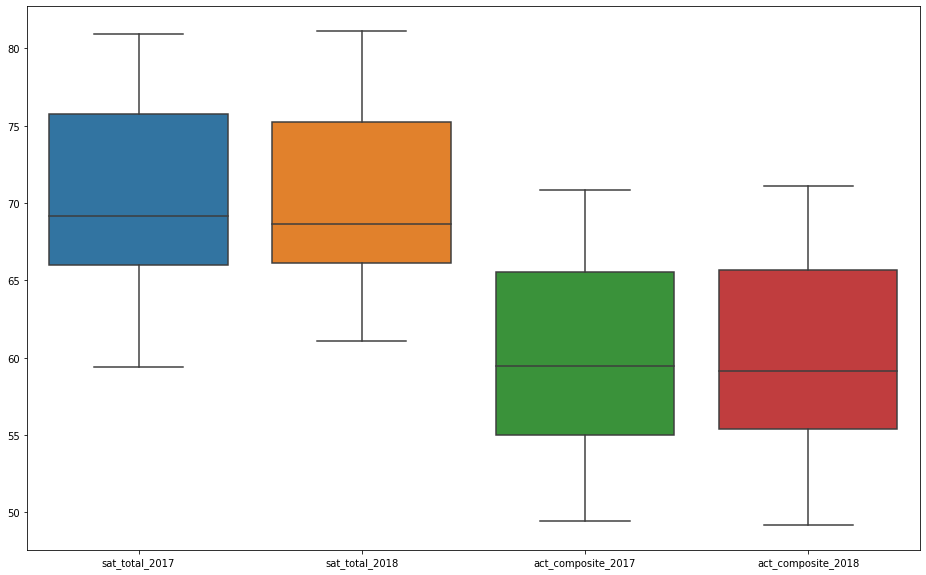

In [249]:
plt.figure(figsize=(16, 10))
sns.boxplot(data = df[score])

In [250]:
df[score].describe()

,sat_total_2017,sat_total_2018,act_composite_2017,act_composite_2018
count,51.000000,51.000000,51.000000,51.000000
mean,70.381373,70.000980,59.776471,59.711765
std,5.781312,5.884964,5.612828,5.865072
min,59.380000,61.060000,49.440000,49.170000
25%,65.970000,66.095000,55.000000,55.420000
50%,69.190000,68.620000,59.440000,59.170000
75%,75.750000,75.250000,65.560000,65.695000
max,80.940000,81.120000,70.830000,71.110000


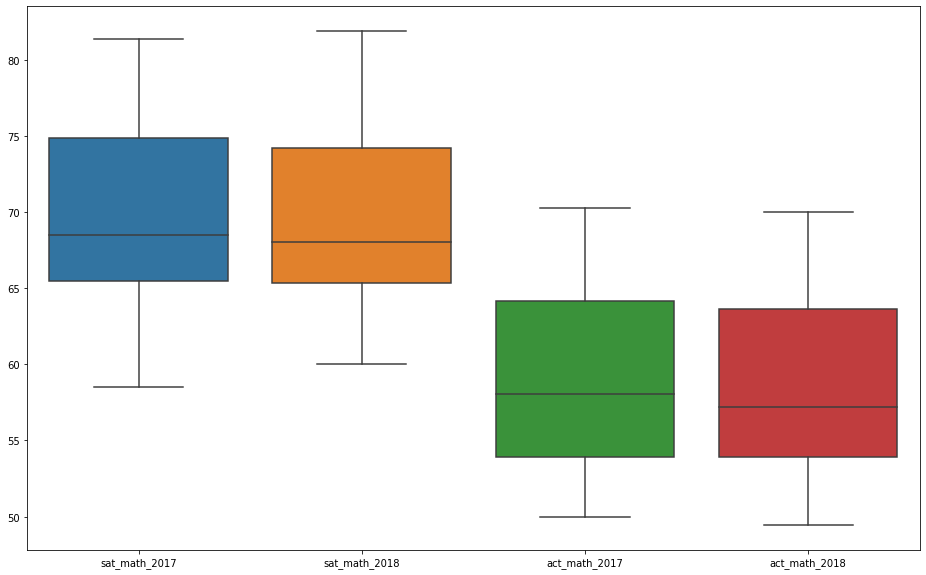

In [251]:
plt.figure(figsize=(16, 10))

sns.boxplot(data=df[math])

In [252]:
df[math].describe()

,sat_math_2017,sat_math_2018,act_math_2017,act_math_2018
count,51.000000,51.000000,51.000000,51.000000
mean,69.610588,69.530196,58.840392,58.513137
std,5.890482,5.972190,5.505482,5.573482
min,58.500000,60.000000,50.000000,49.440000
25%,65.440000,65.315000,53.890000,53.890000
50%,68.500000,68.000000,58.060000,57.220000
75%,74.880000,74.190000,64.170000,63.615000
max,81.380000,81.880000,70.280000,70.000000


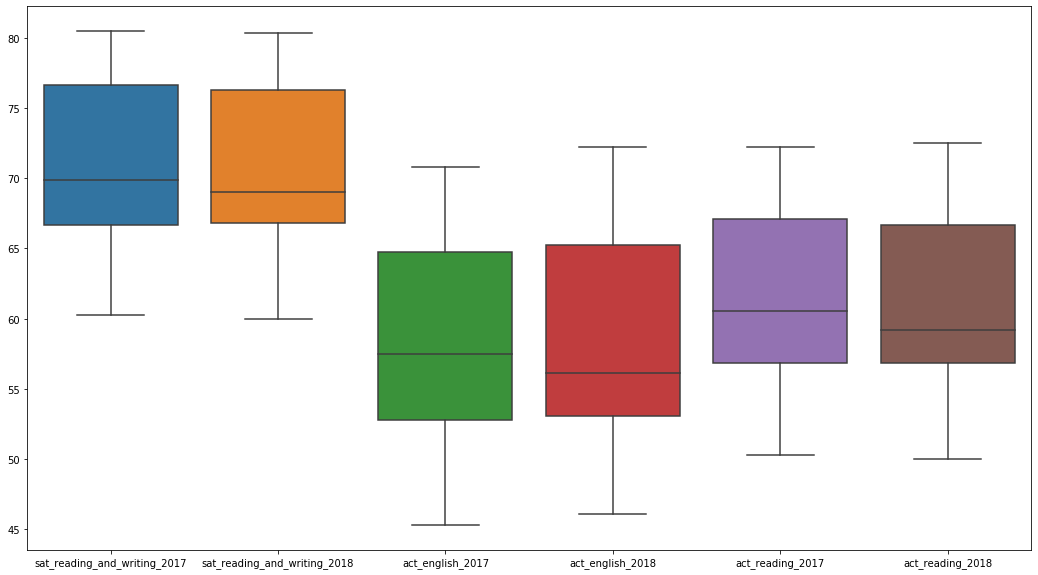

In [253]:
plt.figure(figsize=(18, 10))

sns.boxplot(data=df[rnw])

In [254]:
df[rnw].describe()

,sat_reading_and_writing_2017,sat_reading_and_writing_2018,act_english_2017,act_english_2018,act_reading_2017,act_reading_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,71.140000,70.460588,58.142941,58.104314,61.148431,60.969804
std,5.708442,5.937605,6.537714,6.708390,5.742404,5.930773
min,60.250000,60.000000,45.280000,46.110000,50.280000,50.000000
25%,66.690000,66.815000,52.780000,53.060000,56.805000,56.805000
50%,69.880000,69.000000,57.500000,56.110000,60.560000,59.170000
75%,76.625000,76.315000,64.720000,65.275000,67.080000,66.670000
max,80.500000,80.380000,70.830000,72.220000,72.220000,72.500000


In [255]:
participation = ['state','sat_participation_2017','sat_participation_2018', 'act_participation_2017', 'act_participation_2018']
df[participation].sort_values('act_participation_2018', ascending = True)


,state,sat_participation_2017,sat_participation_2018,act_participation_2017,act_participation_2018
7,Maine,95.0,99.0,8.0,7.0
9,Rhode Island,71.0,97.0,21.0,15.0
15,New Hampshire,96.0,96.0,18.0,16.0
1,Delaware,100.0,100.0,18.0,17.0
23,Pennsylvania,65.0,70.0,23.0,20.0
6,Michigan,100.0,100.0,29.0,22.0
30,Virginia,65.0,68.0,29.0,24.0
22,Washington,64.0,69.0,29.0,24.0
32,Vermont,60.0,64.0,29.0,24.0
33,Massachusetts,76.0,80.0,29.0,25.0
